In [50]:
# import necesseeary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
# Load the datase
df = pd.read_csv('clean_diabetes_data.csv')

In [52]:
# Read the first 5 rows
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


#### LabelEncode categorical features:

In [53]:
# initialize LabelEncoder instance
label_encoder = LabelEncoder()

# transofrm each cateorical variable
categorical_variables = df.select_dtypes(include = 'O')
for column in categorical_variables:
    df[column] = label_encoder.fit_transform(df[column])

In [54]:
# Confirm 
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,3,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,3,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


#### Define features and target variable:

In [55]:
# Define features
X = df.drop('diabetes', axis = 1)

# Define the target variable
y = df['diabetes']

In [56]:
X.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,3,25.19,6.6,140
1,0,54.0,0,0,0,27.32,6.6,80
2,1,28.0,0,0,3,27.32,5.7,158
3,0,36.0,0,0,1,23.45,5.0,155
4,1,76.0,1,1,1,20.14,4.8,155


#### Split the data to training and testing sets:

#### Models:

In [57]:
# Create a function to train, test and evaluate models
def models_func():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42) # set the test_size to 0.3
    
    # initialize the StandardScaler
    scaler = StandardScaler()

    # Fitting the scaler on the training data
    X_train = scaler.fit_transform(X_train)

    # Apply the transformations from training set on the testing set
    X_test = scaler.transform(X_test)
    
    # Create model instances
    models = {'LogisticRegression': LogisticRegression(random_state = 42),
         'DecisionTree': DecisionTreeClassifier(random_state = 42),
         'RandomForest' : RandomForestClassifier(random_state = 42),
         'GradientBoostingClassifier' : GradientBoostingClassifier(random_state = 42),
         'XGBClassifier' : XGBClassifier(random_state = 42)}

    # Create an empty list to store metrics
    metrics = []

    # Loop through the model, train and predict
    for name, model in models.items():
        # Fit the model
        model.fit(X_train, y_train)
        # Predict
        y_pred = model.predict(X_test)
        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)
        class_report = classification_report(y_test, y_pred)
    
        # Print confusion matrix
        print(f"{name}:\n{conf_matrix}\n")
        # append the scores in metrics list
        metrics.append({
                        "Name" : name,
                        "Accuracy_score" : accuracy,
                       "Precision_score" : precision,
                       "recall_score" : recall,
                       "F1_score" : f1})

        # Store the trained random_forest model
        if name == 'RandomForest':
            random_forest_model = model
            
    # Convert the list into a DataFrame
    metrics_df = pd.DataFrame(metrics)

    return random_forest_model, metrics_df

# Call the function
random_forest_model, metrics_df = models_func()

# print metrics df
metrics_df

LogisticRegression:
[[26015   252]
 [  937  1640]]

DecisionTree:
[[25492   775]
 [  660  1917]]

RandomForest:
[[26168    99]
 [  788  1789]]

GradientBoostingClassifier:
[[26243    24]
 [  801  1776]]

XGBClassifier:
[[26196    71]
 [  766  1811]]



,Name,Accuracy_score,Precision_score,recall_score,F1_score
0,LogisticRegression,0.958778,0.866808,0.636399,0.733945
1,DecisionTree,0.950250,0.712110,0.743888,0.727652
2,RandomForest,0.969248,0.947564,0.694218,0.801344
3,GradientBoostingClassifier,0.971398,0.986667,0.689173,0.811515
4,XGBClassifier,0.970982,0.962274,0.702755,0.812290


### Improving Model Accuracy

#### Feature Importance

In [58]:
# check feature importance
importances = random_forest_model.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Features' : X.columns,
                              'Importance': importances})

# Sort
importance_df = importance_df.sort_values(by = 'Importance', ascending = False)

# Display the df
importance_df

,Features,Importance
6,HbA1c_level,0.386217
7,blood_glucose_level,0.325415
5,bmi,0.125720
1,age,0.108935
4,smoking_history,0.021188
2,hypertension,0.014946
3,heart_disease,0.010651
0,gender,0.006928


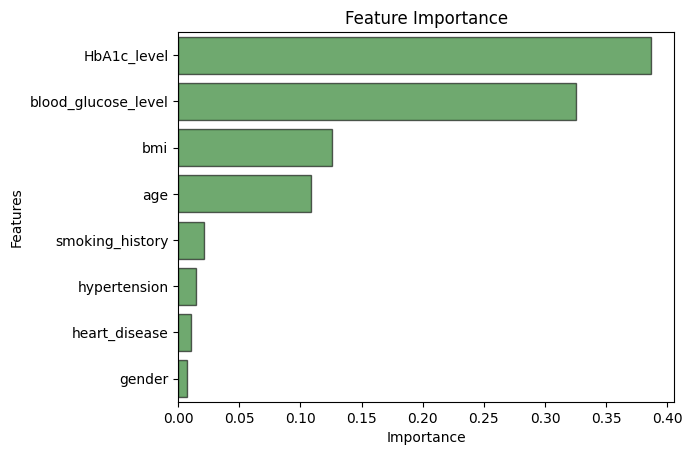

In [59]:
# Plot
sns.barplot(data = importance_df, y = 'Features', x = 'Importance', color = 'green',alpha = 0.6, edgecolor = 'black')

# add title
plt.title("Feature Importance")

# show the plot
plt.show()

Based on the importance scores, I will consider selecting features with higher values eg HbA1c level, blood_glucose_level, bmi, and age. These features are likely to improve model's performance due to their strong relationships with target variable.

#### Feature Selection

In [60]:
X = df.drop(columns = ['smoking_history', 'hypertension', 'heart_disease', 'gender', 'diabetes'], axis = 1)

In [61]:
# Call the DataFrame
random_forest_model, metrics_df = models_func()

# print metrics df
metrics_df

LogisticRegression:
[[26047   220]
 [  975  1602]]

DecisionTree:
[[25635   632]
 [  684  1893]]

RandomForest:
[[26090   177]
 [  779  1798]]

GradientBoostingClassifier:
[[26261     6]
 [  827  1750]]

XGBClassifier:
[[26217    50]
 [  798  1779]]



,Name,Accuracy_score,Precision_score,recall_score,F1_score
0,LogisticRegression,0.958570,0.879254,0.621653,0.728347
1,DecisionTree,0.954375,0.749703,0.734575,0.742062
2,RandomForest,0.966856,0.910380,0.697711,0.789982
3,GradientBoostingClassifier,0.971121,0.996583,0.679084,0.807754
4,XGBClassifier,0.970600,0.972663,0.690338,0.807535
